<a href="https://colab.research.google.com/github/yohanesnuwara/open-geoscience-repository/blob/master/how_to_open_seg_wiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEG Wiki

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2D Vibroseis Line 001: [Link](https://wiki.seg.org/wiki/2D_Vibroseis_Line_001)

In [0]:
!wget http://www.geofizyka.pl/2D_Land_vibro_data_2ms.tgz -P /content/'2D_Land_vibro_data_2ms'

--2020-05-12 09:58:40--  http://www.geofizyka.pl/2D_Land_vibro_data_2ms.tgz
Resolving www.geofizyka.pl (www.geofizyka.pl)... 158.75.199.226
Connecting to www.geofizyka.pl (www.geofizyka.pl)|158.75.199.226|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388949536 (371M) [application/x-gzip]
Saving to: ‘/content/2D_Land_vibro_data_2ms/2D_Land_vibro_data_2ms.tgz’

2D_Land_vibro_data_ 100%[===================>] 370.93M  15.7MB/s    in 29s     

2020-05-12 09:59:09 (12.9 MB/s) - ‘/content/2D_Land_vibro_data_2ms/2D_Land_vibro_data_2ms.tgz’ saved [388949536/388949536]



In [0]:
import tarfile
with tarfile.open('/content/2D_Land_vibro_data_2ms/2D_Land_vibro_data_2ms.tgz', 'r:gz') as tar:
    tar.extractall(path="/content/2D_Land_vibro_data_2ms")

In [0]:
!tar -xvf  '/content/2D_Land_vibro_data_2ms/2D_Land_vibro_data_2ms.tgz' -C '/content/2D_Land_vibro_data_2ms'

Line_001.RPS
Line_001.sgy
Line_001.SPS
Line_001.TXT
Line_001.XPS


In [0]:
!pip install segyio
import segyio

     |████████████████████████████████| 92kB 3.9MB/s 


First we need to specify the `file path`.

In [0]:
filename = '/content/2D_Land_vibro_data_2ms/Line_001.sgy'

Then, run this code to calculate the percentile of the seismic amplitudes, which later we will display as a seismic section with the amplitude color.

In [0]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)

clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 0; the max amplitude is 5110'

The following script displays the seismic section.

Text(0.5, 1.0, 'Line B11 PSTM')

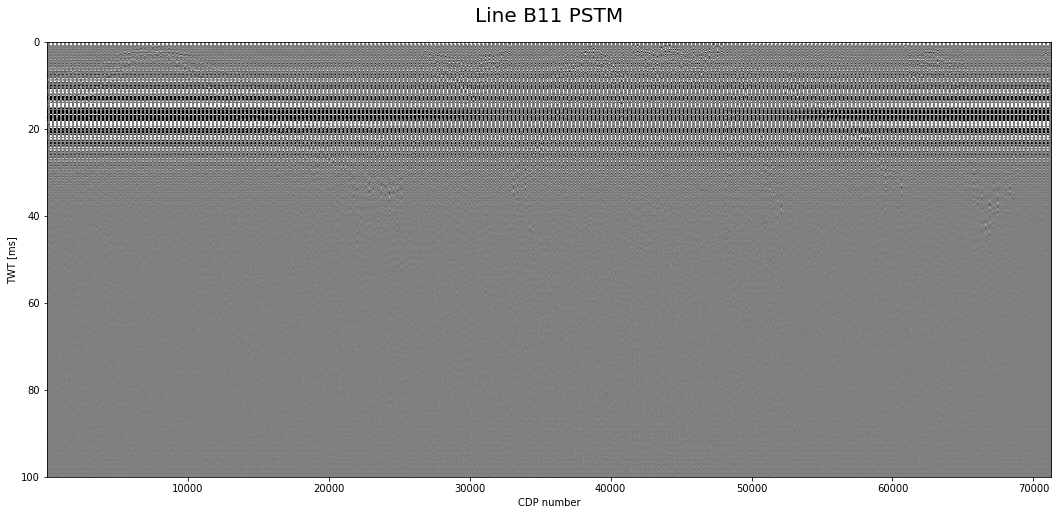

In [0]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
extent = [1, n_traces, 100, twt[0]]  # define extent
ax.imshow(data.T, cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT [ms]')
ax.set_title('Line B11 PSTM', size=20, pad=20)

## Mobil Avo Viking Graben Line 12: [Link](https://wiki.seg.org/wiki/Mobil_AVO_viking_graben_line_12)

### Seismic

In [0]:
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/Mobil_Avo_Viking_Graben_Line_12/seismic.segy -P /content/'Mobil Avo'

--2020-05-12 10:22:48--  http://s3.amazonaws.com/open.source.geoscience/open_data/Mobil_Avo_Viking_Graben_Line_12/seismic.segy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.85.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.85.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 749552400 (715M) [application/octet-stream]
Saving to: ‘/content/Mobil Avo/seismic.segy’

seismic.segy        100%[===================>] 714.83M  44.5MB/s    in 16s     

2020-05-12 10:23:05 (43.4 MB/s) - ‘/content/Mobil Avo/seismic.segy’ saved [749552400/749552400]



In [0]:
filename = '/content/Mobil Avo/seismic.segy'

In [0]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)

clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 73; the max amplitude is 1317'

Text(0.5, 1.0, 'Line B11 PSTM')

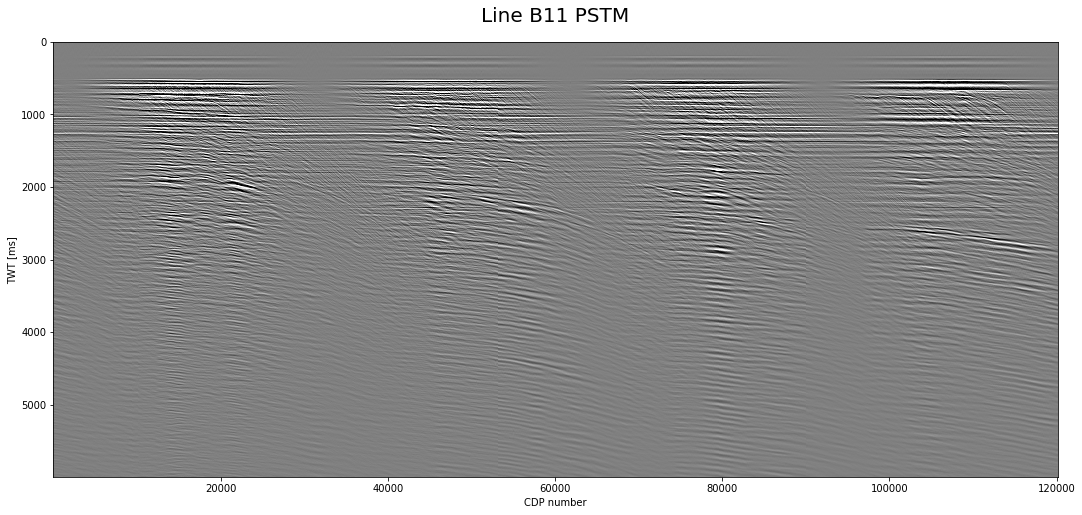

In [0]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
extent = [1, n_traces, twt[-1], twt[0]]  # define extent
ax.imshow(data.T, cmap="gray", vmin=-5, vmax=5, aspect='auto', extent=extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT [ms]')
ax.set_title('Line B11 PSTM', size=20, pad=20)

### Well logs

In [0]:
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/Mobil_Avo_Viking_Graben_Line_12/mobil_wellogs.tar.gz -P /content/'Mobil Avo'

--2020-05-12 10:23:43--  http://s3.amazonaws.com/open.source.geoscience/open_data/Mobil_Avo_Viking_Graben_Line_12/mobil_wellogs.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.81.67
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.81.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1129175 (1.1M) [application/x-gzip]
Saving to: ‘/content/Mobil Avo/mobil_wellogs.tar.gz’

mobil_wellogs.tar.g 100%[===================>]   1.08M  2.75MB/s    in 0.4s    

2020-05-12 10:23:44 (2.75 MB/s) - ‘/content/Mobil Avo/mobil_wellogs.tar.gz’ saved [1129175/1129175]



In [0]:
!cd /content/'Mobil Avo'
with tarfile.open('/content/Mobil Avo/mobil_wellogs.tar.gz', 'r:gz') as tar:
    tar.extractall(path="/content/Mobil Avo")

## Stratton 3D [Link](https://wiki.seg.org/wiki/Stratton_3D_survey)

### Seismic (3D filtered migration)

In [0]:
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/segy/processed/Stratton3D_32bit.sgy -P /content/'Stratton/seismic'

--2020-05-12 10:30:59--  http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/segy/processed/Stratton3D_32bit.sgy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443764680 (423M) [application/octet-stream]
Saving to: ‘/content/Stratton/seismic/Stratton3D_32bit.sgy’

Stratton3D_32bit.sg 100%[===================>] 423.21M  38.5MB/s    in 11s     

2020-05-12 10:31:11 (36.9 MB/s) - ‘/content/Stratton/seismic/Stratton3D_32bit.sgy’ saved [443764680/443764680]



In [0]:
filename = '/content/Stratton/seismic/Stratton3D_32bit.sgy'

In [0]:
with segyio.open(filename, ignore_geometry=True) as f:
  # print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  # print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = f.trace.raw[:]
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)
  print(f.attributes(189)[:])

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

[0 0 0 ... 0 0 0]


'The 99th percentile is 2745; the max amplitude is 5715'

In [0]:
import re

In [0]:
def parse_trace_headers(segyfile, n_traces):
    '''
    Parse the segy file trace headers into a pandas dataframe.
    Column names are defined from segyio internal tracefield
    One row per trace
    '''
    # Get all header keys
    headers = segyio.tracefield.keys
    # Initialize dataframe with trace id as index and headers as columns
    df = pd.DataFrame(index=range(1, n_traces + 1),
                      columns=headers.keys())
    # Fill dataframe with all header values
    for k, v in headers.items():
        df[k] = segyfile.attributes(v)[:]
    return df


def parse_text_header(segyfile):
    '''
    Format segy text header into a readable, clean dict
    '''
    raw_header = segyio.tools.wrap(segyfile.text[0])
    # Cut on C*int pattern
    cut_header = re.split(r'C ', raw_header)[1::]
    # Remove end of line return
    text_header = [x.replace('\n', ' ') for x in cut_header]
    text_header[-1] = text_header[-1][:-2]
    # Format in dict
    clean_header = {}
    i = 1
    for item in text_header:
        key = "C" + str(i).rjust(2, '0')
        i += 1
        clean_header[key] = item
    return clean_header

In [0]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    # Load headers
    bin_headers = f.bin
    # text_headers = parse_text_header(f)
    trace_headers = parse_trace_headers(f, n_traces)
f'N Traces: {n_traces}, N Samples: {n_samples}, Sample rate: {sample_rate}ms'

'N Traces: 71070, N Samples: 1501, Sample rate: 2.0ms'

In [0]:
trace_headers.columns

Index(['TRACE_SEQUENCE_LINE', 'TRACE_SEQUENCE_FILE', 'FieldRecord',
       'TraceNumber', 'EnergySourcePoint', 'CDP', 'CDP_TRACE',
       'TraceIdentificationCode', 'NSummedTraces', 'NStackedTraces', 'DataUse',
       'offset', 'ReceiverGroupElevation', 'SourceSurfaceElevation',
       'SourceDepth', 'ReceiverDatumElevation', 'SourceDatumElevation',
       'SourceWaterDepth', 'GroupWaterDepth', 'ElevationScalar',
       'SourceGroupScalar', 'SourceX', 'SourceY', 'GroupX', 'GroupY',
       'CoordinateUnits', 'WeatheringVelocity', 'SubWeatheringVelocity',
       'SourceUpholeTime', 'GroupUpholeTime', 'SourceStaticCorrection',
       'GroupStaticCorrection', 'TotalStaticApplied', 'LagTimeA', 'LagTimeB',
       'DelayRecordingTime', 'MuteTimeStart', 'MuteTimeEND',
       'TRACE_SAMPLE_COUNT', 'TRACE_SAMPLE_INTERVAL', 'GainType',
       'InstrumentGainConstant', 'InstrumentInitialGain', 'Correlated',
       'SweepFrequencyStart', 'SweepFrequencyEnd', 'SweepLength', 'SweepType',
       'Swee

In [0]:
trace_headers['CDP_X']

1        0
2        0
3        0
4        0
5        0
        ..
71066    0
71067    0
71068    0
71069    0
71070    0
Name: CDP_X, Length: 71070, dtype: int32

### Well logs

In [0]:
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/Stratton_wells.zip -P /content/'Stratton'

--2020-05-05 17:50:10--  http://s3.amazonaws.com/open.source.geoscience/open_data/stratton/Stratton_wells.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1076309 (1.0M) [application/zip]
Saving to: ‘/content/Stratton/Stratton_wells.zip’

Stratton_wells.zip  100%[===================>]   1.03M  5.95MB/s    in 0.2s    

2020-05-05 17:50:11 (5.95 MB/s) - ‘/content/Stratton/Stratton_wells.zip’ saved [1076309/1076309]



In [0]:
import zipfile

zipref = zipfile.ZipFile("/content/Stratton/Stratton_wells.zip", 'r') 
zipref.extractall("/content/Stratton/wells")

## Project Blake Ridge Hydrates 3D: [Link](https://wiki.seg.org/wiki/Blake_ridge_3D)

CBVS file instead of SGY?

Code to open Google Drive data from its ID (URL):<br>
`wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=FILEID" -O FILENAME && rm -rf /tmp/cookies.txt`

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B2QlmHOqpoj1bXR4THNITDQ4UVE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B2QlmHOqpoj1bXR4THNITDQ4UVE" -O Blake_Ridge_Hydrates_3D.zip && rm -rf /tmp/cookies.txt

--2020-05-11 18:54:18--  https://docs.google.com/uc?export=download&confirm=_HEs&id=0B2QlmHOqpoj1bXR4THNITDQ4UVE
Resolving docs.google.com (docs.google.com)... 108.177.13.139, 108.177.13.101, 108.177.13.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-2o-docs.googleusercontent.com/docs/securesc/p4s99dh87e5dii6ulilqhd8ocknu7ifq/gb0o1hotc4gb58fc90o6j7g4ufpbetnd/1589223225000/17464323907045469692/01373961916724535692Z/0B2QlmHOqpoj1bXR4THNITDQ4UVE?e=download [following]
--2020-05-11 18:54:18--  https://doc-0g-2o-docs.googleusercontent.com/docs/securesc/p4s99dh87e5dii6ulilqhd8ocknu7ifq/gb0o1hotc4gb58fc90o6j7g4ufpbetnd/1589223225000/17464323907045469692/01373961916724535692Z/0B2QlmHOqpoj1bXR4THNITDQ4UVE?e=download
Resolving doc-0g-2o-docs.googleusercontent.com (doc-0g-2o-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0g-2o-

In [0]:
import zipfile

zipref = zipfile.ZipFile("/content/Blake_Ridge_Hydrates_3D.zip", 'r') 
zipref.extractall("/content/Blake_Ridge_Hydrates_3D")

In [0]:
!pip install segyio

     |████████████████████████████████| 92kB 2.5MB/s 


In [0]:
import segyio

In [0]:
filename = '/content/Blake_Ridge_Hydrates_3D/Blake_Ridge_Hydrates_3D/Seismics/Stack_final.cbvs'

In [0]:
segyio.open(filename, ignore_geometry=True)

RuntimeError: ignored

## Opunake 3D

In [0]:
!wget http://s3.amazonaws.com/open.source.geoscience/open_data/newzealand/Taranaiki_Basin/OPUNAKE-3D/OPUNAKE3D-PR3461-FS.3D.Final_Stack.sgy

--2020-05-12 10:54:34--  http://s3.amazonaws.com/open.source.geoscience/open_data/newzealand/Taranaiki_Basin/OPUNAKE-3D/OPUNAKE3D-PR3461-FS.3D.Final_Stack.sgy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.84.19
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.84.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10402944680 (9.7G) [application/octet-stream]
Saving to: ‘OPUNAKE3D-PR3461-FS.3D.Final_Stack.sgy’

OPUNAKE3D-PR3461-FS 100%[===================>]   9.69G  36.3MB/s    in 4m 37s  

2020-05-12 10:59:11 (35.8 MB/s) - ‘OPUNAKE3D-PR3461-FS.3D.Final_Stack.sgy’ saved [10402944680/10402944680]



In [0]:
with segyio.open(filename, ignore_geometry=False) as f:
  # print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  # print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = f.trace.raw[:]
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)
  # print(f.attributes(189)[:])

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

RuntimeError: ignored